In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Load in data and remove useless columns
data = pd.read_csv("framingham_dataset.csv")
data = data.drop(["id", "month"], 1).fillna(0)
data.head()

,sex,sbp,dbp,scl,age,bmi,followup,chdfate
0,1,120,80,267.0,55,25.0,18,1
1,1,130,78,192.0,53,28.4,35,1
2,1,144,90,207.0,61,25.1,109,1
3,1,92,66,231.0,48,26.2,147,1
4,1,162,98,271.0,39,28.4,169,1


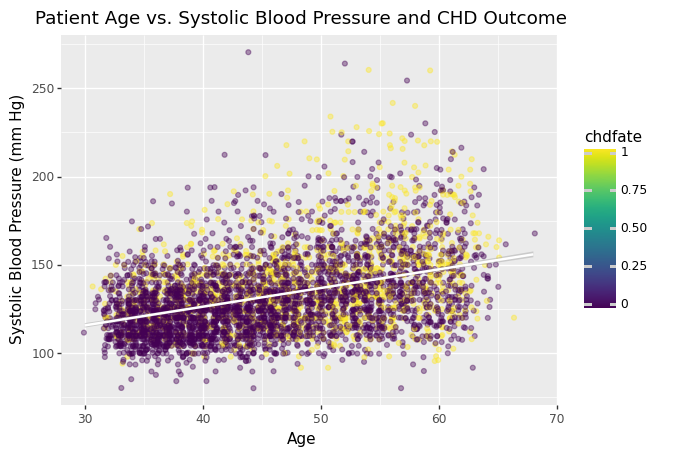

<ggplot: (-9223363275480269992)>

In [3]:
#exploring/visualizing the data
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_bar, geom_density, geom_freqpoly, geom_smooth, labs, geom_boxplot, geom_line
ggplot(data, aes(x='age', y='sbp', color='chdfate'))+geom_point(alpha=0.4, position='jitter')+geom_smooth(color="white")+labs(title="Patient Age vs. Systolic Blood Pressure and CHD Outcome", x="Age", y="Systolic Blood Pressure (mm Hg)")

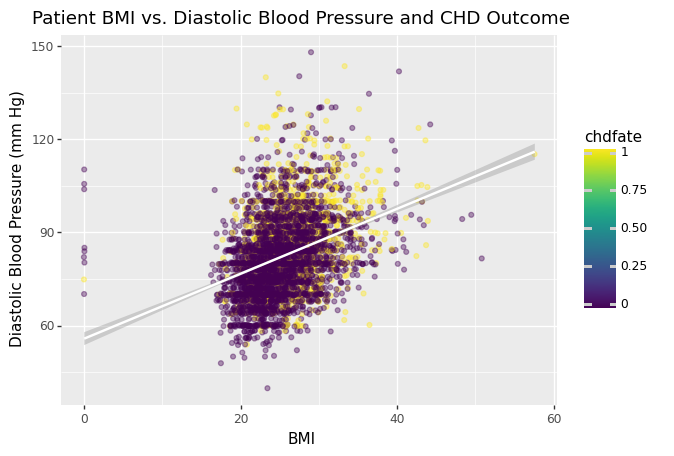

<ggplot: (8761370562494)>

In [4]:
ggplot(data, aes(x='bmi', y='dbp', color='chdfate'))+geom_point(alpha=0.4, position='jitter')+geom_smooth(color="white")+labs(title="Patient BMI vs. Diastolic Blood Pressure and CHD Outcome", x="BMI", y="Diastolic Blood Pressure (mm Hg)")

[[4.02731514e-03 9.95972685e-01]
 [2.00515726e-03 9.97994843e-01]
 [9.94701169e-01 5.29883066e-03]
 [8.47625806e-01 1.52374194e-01]
 [1.66665036e-03 9.98333350e-01]
 [4.99938552e-01 5.00061448e-01]
 [9.80236861e-01 1.97631392e-02]
 [9.76536616e-01 2.34633843e-02]
 [1.79993032e-02 9.82000697e-01]
 [2.93534820e-01 7.06465180e-01]
 [9.95837980e-01 4.16201961e-03]
 [2.53553400e-01 7.46446600e-01]
 [9.92334325e-01 7.66567488e-03]
 [3.80412811e-02 9.61958719e-01]
 [6.47854323e-02 9.35214568e-01]
 [1.92346446e-01 8.07653554e-01]
 [8.55196114e-01 1.44803886e-01]
 [4.34676792e-02 9.56532321e-01]
 [8.43042493e-01 1.56957507e-01]
 [5.50912415e-02 9.44908759e-01]
 [1.32992380e-01 8.67007620e-01]
 [5.89717936e-01 4.10282064e-01]
 [9.79518433e-01 2.04815673e-02]
 [3.32906248e-01 6.67093752e-01]
 [9.95736653e-01 4.26334713e-03]
 [4.33055309e-02 9.56694469e-01]
 [3.07422638e-01 6.92577362e-01]
 [5.59324053e-03 9.94406759e-01]
 [9.75084001e-01 2.49159988e-02]
 [4.49457316e-01 5.50542684e-01]
 [2.077854

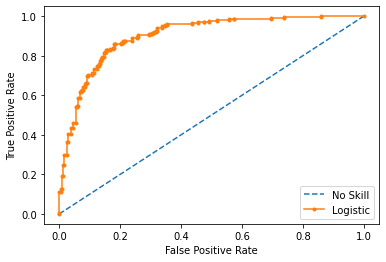

In [ ]:
#Code Walkthrough for creating an ROC Model -- using random numbers

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import pandas as pd
import seaborn as sns


# generate 2 class dataset -- used with make_classification from sklearn
#using a randomly generated dataset just for the purposes of 
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)


# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)


# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]


# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)


# predict probabilities
lr_probs = model.predict_proba(testX)


# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]


# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)


# summarize scores
print('No Skill: ROC AUC=', (ns_auc))
print('Logistic: ROC AUC=' ,(lr_auc))


# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)


# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')


# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')


# show the legend
pyplot.legend()

# show the plot
pyplot.show()

In [ ]:
# Now that we know how to create an ROC model
# We can use our previous dataset to actually create one

#Create test splits and logistic regression
X = data.drop(["chdfate"], 1)
y = data["chdfate"]

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

lgr = LogisticRegression(solver="lbfgs")
lgr.fit(train_x, train_y)

# Save predicted values and predicted value probabilities (prob of being classed "+")
pred = lgr.predict(test_x)
pred_prob = lgr.predict_proba(test_x)[:, 1]


print("Test accuracy:")
print(lgr.score(test_x,test_y))
print("Vector with coefficient values for theta_1, theta_2")
print("theta_0:",lgr.intercept_[0],"theta_1, theta_2: = ",lgr.coef_[0])

Test accuracy:
0.6904255319148936
Vector with coefficient values for theta_1, theta_2
theta_0: -0.000905542214472275 theta_1, theta_2: =  [-0.01228904 -0.00045281  0.00288606  0.00453911 -0.02355973  0.04436643
 -0.00026746]


Text(0.5, 1.0, 'Framingham Data ROC Curve; AUC=0.7592')

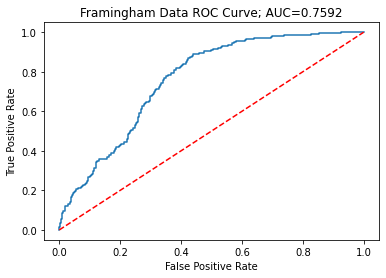

In [ ]:
# ROC Graph
fpr, tpr, thresholds = roc_curve(test_y, pred_prob)
auc = roc_auc_score(test_y, pred_prob)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--', color="red")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Framingham Data ROC Curve; AUC={}".format(round(auc, 4)))

In [ ]:
#Another way to evaluate a classification model is using a confusion matrix. 

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import svm, datasets
from sklearn.metrics import plot_confusion_matrix

from sklearn import metrics
cm = metrics.confusion_matrix(test_y, pred)


class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(pd.DataFrame(cm), annot=labels, cmap="Greens" ,fmt='')

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual CHDfate')
plt.xlabel('Predicted CHDfate')

print("Accuracy:",metrics.accuracy_score(test_y, pred))
print("Precision:",metrics.precision_score(test_y, pred))
print("Recall:",metrics.recall_score(test_y, pred))
print("F1:", metrics.f1_scor(test_y, pred))
print(cm)

NameError: ignored

Text(0.5, 15.0, 'Predicted CHDfate')

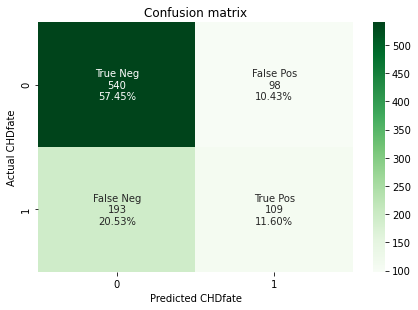

In [ ]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Greens')

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual CHDfate')
plt.xlabel('Predicted CHDfate')

#https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

In [ ]:
# Create random correlated data
X_rand, y_rand = make_classification(n_samples=50000, n_classes=2, random_state=0)

rand_train_x, rand_test_x, rand_train_y, rand_test_y = train_test_split(X_rand, y_rand, test_size=0.2, 
                                                    random_state=0)

lgr_rand = LogisticRegression(solver="lbfgs")
lgr_rand.fit(rand_train_x, rand_train_y)

# Save predicted values and predicted value probabilities (prob of being classed "+")
pred_rand = lgr_rand.predict(rand_test_x)
pred_prob_rand = lgr_rand.predict_proba(rand_test_x)[:, 1]

In [ ]:
def draw_graph(actual, probs):
  num_points = 100
  threshold = []
  precision = []
  recall = []
  f1 = []
  accuracy = []

  t_inc = 1 / num_points

  try:
    actual = actual.reset_index(drop=True)
  except:
    pass

  for i in range(num_points):
    t = i * t_inc
    tp = 0
    fp = 0
    tn = 0
    fn = 0
    for j in range(len(probs)):
      # Classed as positive
      if probs[j] > t:
        # classed + and is actually +
        if actual[j] == 1:
          tp += 1
        # classed + but is actually -
        else:
          fp += 1
      # Classes as negative
      else:
        # classed - and is actually -
        if actual[j] == 0:
          tn += 1
        else:
          fn += 1

    try:
      p = tp / (tp + fp)
    except ZeroDivisionError:
      p = 1
    try:
      r = tp / (tp + fn)
    except ZeroDivisionError:
      r = 1
    try:
      a = (tp + tn) / (tp + tn + fp + fn)
    except ZeroDivisionError:
      a = 1

    threshold.append(t)
    precision.append(p)
    recall.append(r)
    f1.append(2 * (p * r) / (p + r))
    accuracy.append(a)

  fig, ax = plt.subplots()
  ax.plot(threshold, precision, label="Precision")
  ax.plot(threshold, recall, label="Recall")
  ax.plot(threshold, accuracy, label="Accuracy")
  ax.plot(threshold, f1, label="F1")
  plt.legend()
  plt.title("Measures of Model Reliability v. Threshold")
  plt.xlabel("Threshold")
  plt.ylabel("Measure Value")

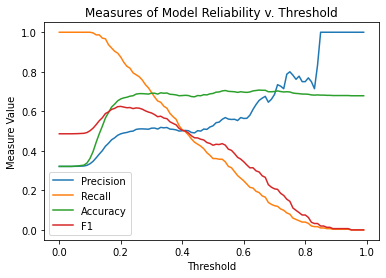

In [ ]:
# Framingham data
draw_graph(test_y, pred_prob)

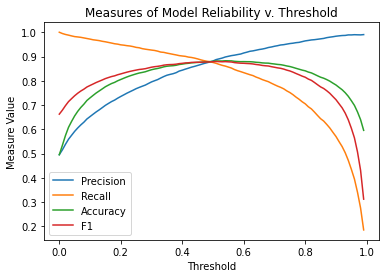

In [ ]:
# Random data
draw_graph(rand_test_y, pred_prob_rand)